In [1]:
import soil
import networkx as nx
 
%load_ext autoreload
%autoreload 2

# To display plots in the notebook
%pylab inline

from soil import *

Populating the interactive namespace from numpy and matplotlib


# News Spreading example with SOIL

In this example we three different kinds of models, which we combine in five types of simulation

In [6]:
!ls 

total 288K
drwxr-xr-x  7 j users 4.0K May 23 12:48 .
drwxr-xr-x 15 j users  20K May  7 18:59 ..
-rw-r--r--  1 j users  451 Oct 17  2017 complete.yml
drwxr-xr-x  2 j users 4.0K Feb 18 11:22 .ipynb_checkpoints
drwxr-xr-x  2 j users 4.0K Oct 17  2017 long_running
-rw-r--r--  1 j users 1.2K May 23 12:49 .nbgrader.log
drwxr-xr-x  4 j users 4.0K May  4 11:23 newsspread
-rw-r--r--  1 j users 225K May  4 11:23 NewsSpread.ipynb
drwxr-xr-x  4 j users 4.0K May  4 11:21 rabbits
-rw-r--r--  1 j users   42 Jul  3  2017 torvalds.edgelist
-rw-r--r--  1 j users  245 Oct 13  2017 torvalds.yml
drwxr-xr-x  4 j users 4.0K May  4 11:23 tutorial


In [9]:
!cat newsspread/NewsSpread.yml

---
default_state: {}
load_module: newsspread
environment_agents: []
environment_params:
  prob_neighbor_spread: 0.0
  prob_tv_spread: 0.01
interval: 1
max_time: 30
name: Sim_all_dumb
network_agents:
- agent_class: DumbViewer
  state:
    has_tv: false
  weight: 1
- agent_class: DumbViewer
  state:
    has_tv: true
  weight: 1
network_params:
  generator: barabasi_albert_graph
  n: 500
  m: 5
num_trials: 50
---
default_state: {}
load_module: newsspread
environment_agents: []
environment_params:
  prob_neighbor_spread: 0.0
  prob_tv_spread: 0.01
interval: 1
max_time: 30
name: Sim_half_herd
network_agents:
- agent_class: DumbViewer
  state:
    has_tv: false
  weight: 1
- agent_class: DumbViewer
  state:
    has_tv: true
  weight: 1
- agent_class: HerdViewer
  state:
    has_tv: false
  weight: 1
- agent_class: HerdViewer
  state:
    has_tv: true
  weight: 1
network_params:
  generator: barabasi_albert_graph
  n: 500
  m: 5
num_trials: 50
---
default_state: {}
load_module: newsspread
en

In [10]:
evodumb = analysis.read_data('soil_output/Sim_all_dumb/', group=True, process=analysis.get_count, keys=['id']);

ValueError: No objects to concatenate

In [ ]:
evodumb['mean'].plot(yerr=evodumb['std'])

In [5]:
evodumb = analysis.read_data('soil_output/Sim_all_dumb/', group=True, process=analysis.get_count, keys=['id']);
evohalfherd = analysis.read_data('soil_output/Sim_half_herd/', group=True, process=analysis.get_count, keys=['id'])
evoherd = analysis.read_data('soil_output/Sim_all_herd/', group=True, process=analysis.get_count, keys=['id'])
evoherdwise = analysis.read_data('soil_output/Sim_wise_herd/', group=True, process=analysis.get_count, keys=['id'])
evowise = analysis.read_data('soil_output/Sim_all_wise/', group=True, process=analysis.get_count, keys=['id'])

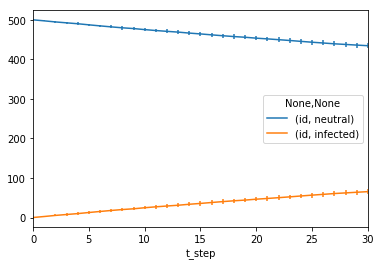

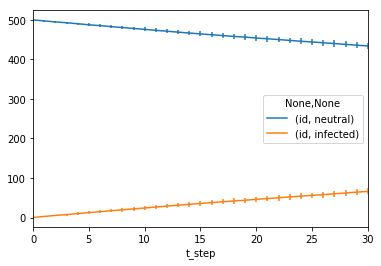

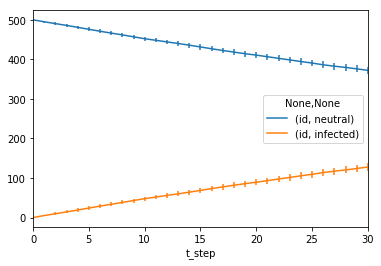

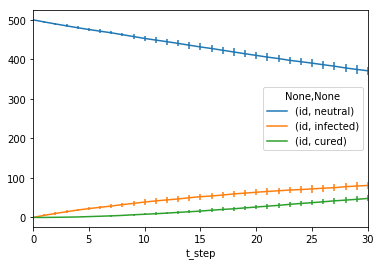

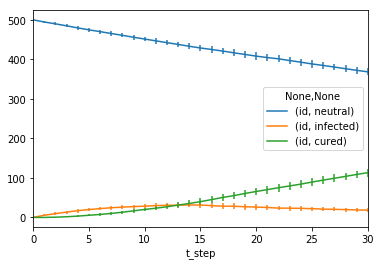

In [6]:
for i in [evodumb, evohalfherd, evoherd, evoherdwise, evowise]:
    i['mean'].plot(yerr=i['std'])

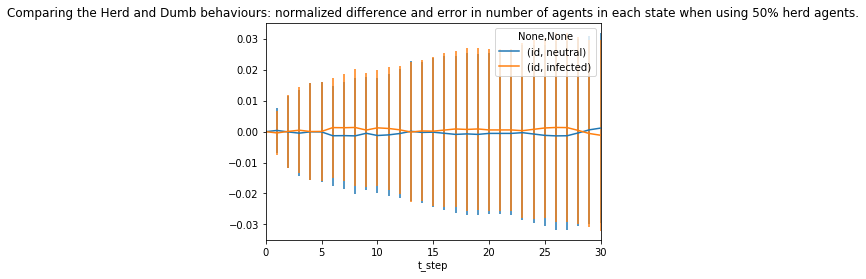

In [10]:
diff = evodumb['mean']-evohalfherd['mean']
m = evodumb['max'].loc[0].sum()
diff = diff / m
diff.plot(yerr=(evodumb['std']+evoherd['std'])/m,
          title='Comparing the Herd and Dumb behaviours: normalized difference and error in number of agents in each state when using 50% herd agents.');

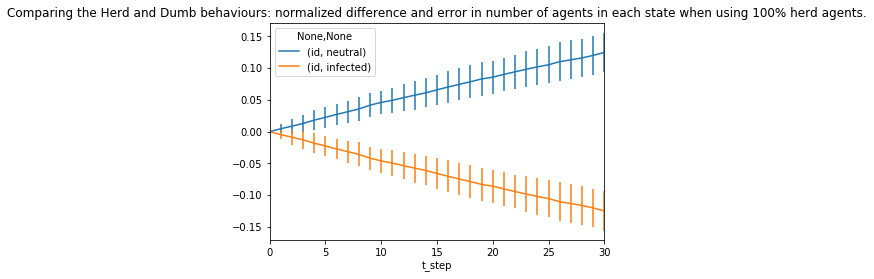

In [11]:
diff = evodumb['mean']-evoherd['mean']
m = evodumb['max'].loc[0].sum()
diff = diff / m
diff.plot(yerr=(evodumb['std']+evoherd['std'])/m,
          title='Comparing the Herd and Dumb behaviours: normalized difference and error in number of agents in each state when using 100% herd agents.');

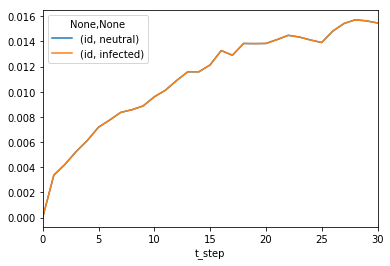

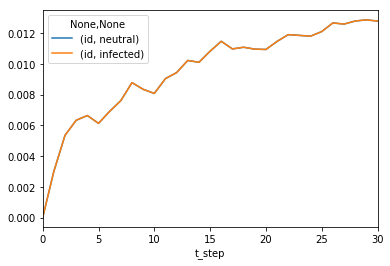

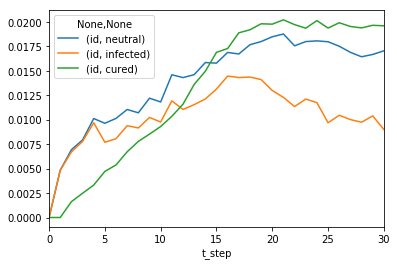

In [13]:
(evohalfherd['std']/m).plot()
(evodumb['std']/m).plot()
(evowise['std']/m).plot()